# EDA of New Taiwan House Price Dataset


## Importing Libraries

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
url="https://aisgaiap.blob.core.windows.net/aiap4-assessment/real_estate.csv"
df = pd.read_csv(url, index_col=0)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
categorical_date = ['date']
numerical_house_age = ['house_age']
numercial_dist_mrt = ['dist_to_mrt']
categorical_conv_stores = ['num_conv_stores']
lat_long = ['lat', 'long']
target = ['price_per_unit_area']

variables = categorical_date + numerical_house_age + numercial_dist_mrt + categorical_conv_stores + lat_long
df.columns = variables+target

Renaming columns for easier identification.

## Data Insights

In [4]:
df.shape

(414, 7)

In [5]:
df.isnull().sum()

date                   0
house_age              0
dist_to_mrt            0
num_conv_stores        0
lat                    0
long                   0
price_per_unit_area    0
dtype: int64

There is no missing values.

## Summary Statistics

In [6]:
df.describe()

,date,house_age,dist_to_mrt,num_conv_stores,lat,long,price_per_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


- Mean value is slightly less than median value (50%) for target variable
- Notably large different in 75% and max values for "dist_to_mrt" could mean there are some extreme Outlier values in the dataset

## Data Visualization

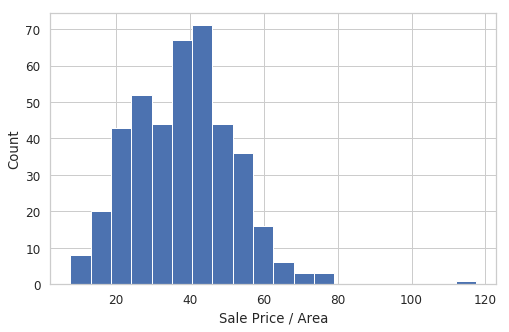

In [7]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(df[target], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='Sale Price / Area', ylabel='Count');

## Check Correlation

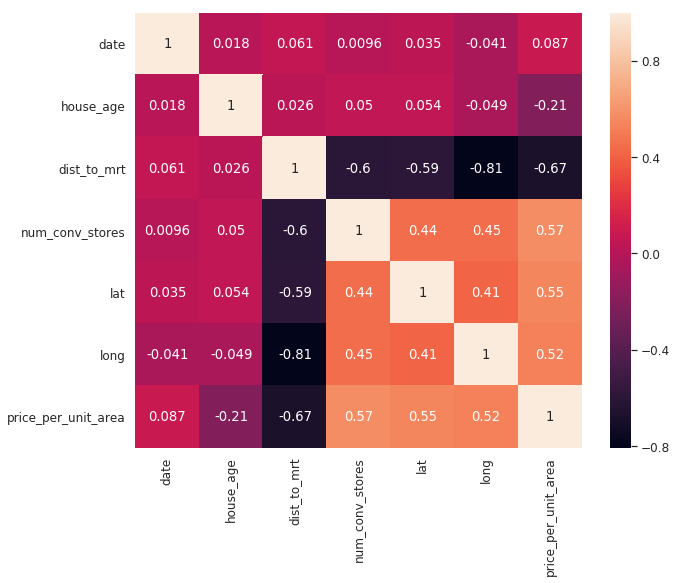

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot=True)

- "num_of_conv_store" & "lat", "long" has positive a positive correlation to the price with coefficient values > 0.5
- while "dist_to_mrt" has a negative correlation to the price with coefficient values < -0.5

## Check Distribution & Pair-wise Relationships

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


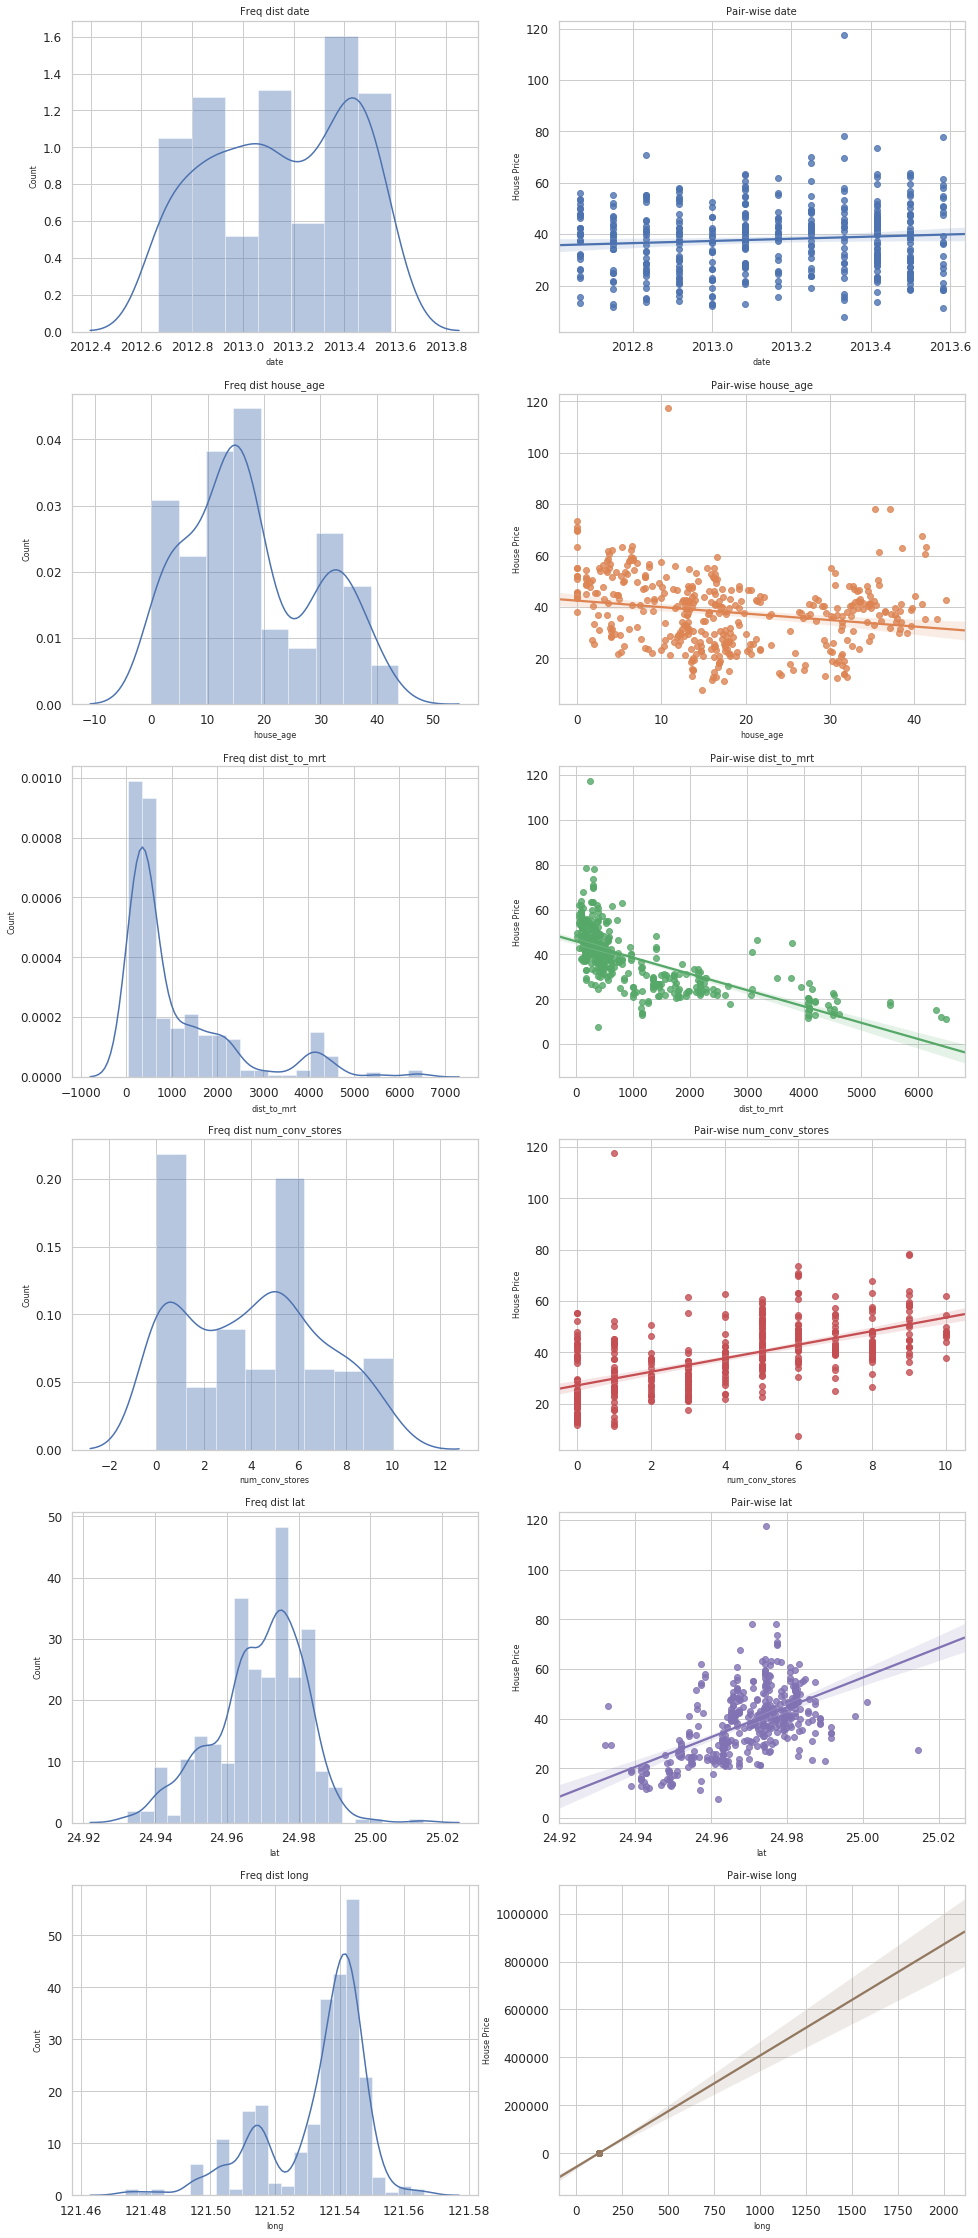

In [9]:
column_labels = categorical_date + numerical_house_age + numercial_dist_mrt + categorical_conv_stores + lat_long

fig, ax = plt.subplots(len(column_labels), 2, figsize=(16,40))

for i, col_val in enumerate(column_labels):
    for j in range(2):

        if (j==0):
            sns.distplot(df[col_val], hist=True, ax=ax[i][j])
            ax[i][0].set_title('Freq dist '+col_val, fontsize=10)
            ax[i][0].set_xlabel(col_val, fontsize=8)
            ax[i][0].set_ylabel('Count', fontsize=8)
        
        if(j==1):
            sns.regplot(x=col_val, y="price_per_unit_area", data=df, ax=ax[i][j])
            ax[i][1].set_title('Pair-wise '+col_val, fontsize=10)
            ax[i][1].set_xlabel(col_val, fontsize=8)
            ax[i][1].set_ylabel('House Price', fontsize=8)

## Visualize Location Characteristics

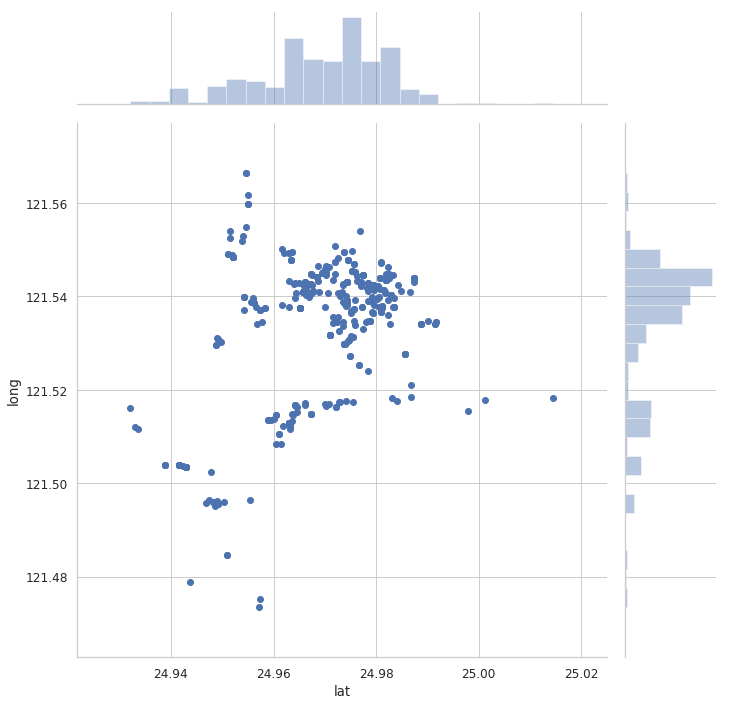

In [10]:
sns.jointplot(x=df['lat'], y=df['long'], height=10)

## Check Outliers

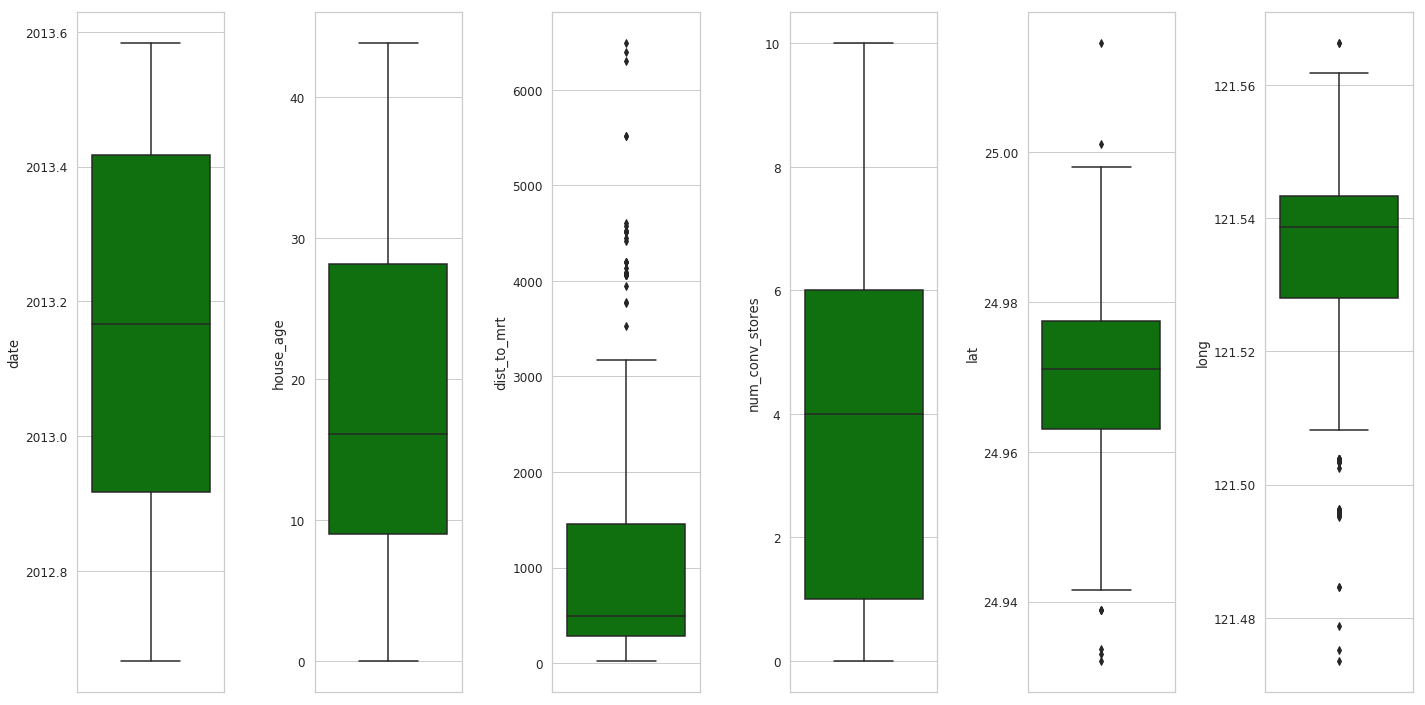

In [11]:
l = df.columns.values
fig,ax = plt.subplots(1,6,figsize=(20,10))
for i in range(6):
    plt.subplot(1, 6, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()

- "dist_to_mrt", "lat" & "long" contain some outliers

## Check Distribution & Skewness

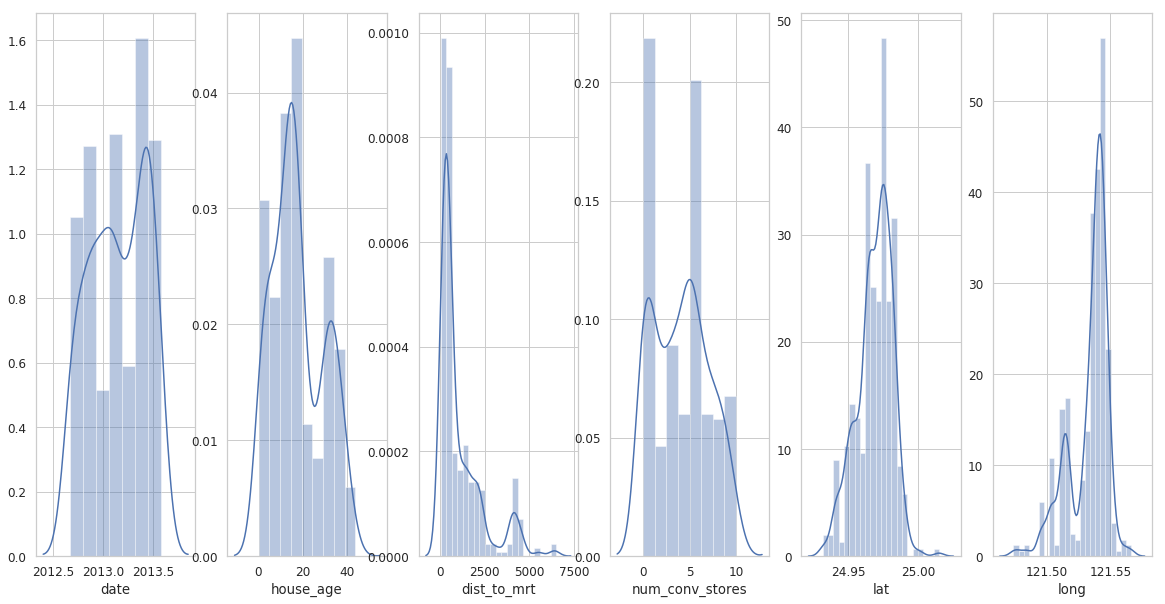

In [12]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(1, 6, i+1)
    sns.distplot(df[l[i]],kde=True) 

- all variables do not appear to be normally distributed, while "dist_to_mrt" is right skewed.

## Processing File

### Scale

Normalize and center numeric values

In [23]:
names = df[variables].columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(df[variables])
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,date,house_age,dist_to_mrt,num_conv_stores,lat,long
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


### Train/Test Split

Peform a train/test split to obtain a subset of data to test the models. The split used is a 80/20.

In [24]:
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(331, 6) (331, 1)
(83, 6) (83, 1)


### First Model - Linear Regression

In [41]:
lm = linear_model.LinearRegression()
lm_model = lm.fit(X_train, y_train)
lm_predictions = lm.predict(X_test)

Text(0, 0.5, 'Predictions')

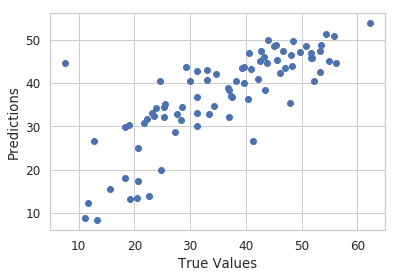

In [42]:
plt.scatter(y_test, lm_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [43]:
print('Score', lm_model.score(X_test, y_test))

Score 0.6200355022410846


### Second Model - Lasso  Regression

In [44]:
ls = linear_model.Lasso(max_iter=2000)
ls_model = ls.fit(X_train, y_train)
ls_predictions = ls.predict(X_test)

Text(0, 0.5, 'Predictions')

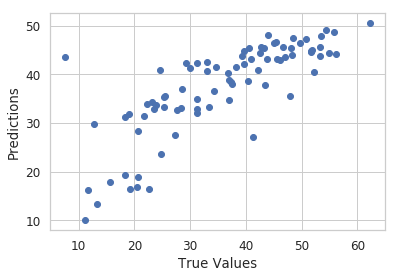

In [45]:
plt.scatter(y_test, ls_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [46]:
print('Score', ls_model.score(X_test, y_test))

Score 0.6031791616569357


### Third Model - Ridge Regression

In [47]:
lr = linear_model.Ridge(max_iter=2000)
lr_model = lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

Text(0, 0.5, 'Predictions')

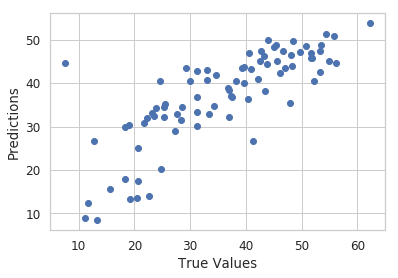

In [48]:
plt.scatter(y_test, lr_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [49]:
print('Score', lr_model.score(X_test, y_test))

Score 0.6210677293521139


### Scoring

In [62]:
print('Linear Regression score is %f' % lm.score(X_test, y_test))
print('Ridge score is %f' % ls.score(X_test, y_test))
print('Lasso score is %f' % lr.score(X_test, y_test))

Linear Regression score is 0.620036
Ridge score is 0.603179
Lasso score is 0.621068
